# Atlas viewer

This atlas viewer reads out the atlas information at a given MNI coordinate, from the following five atlases:
1. SPM12's **Anatomical Automatic Labeling (AAL)** atlas
2. FreeSurfer's **Desikan-Killiany** atlas (based on subject `cvs_avg35_inMNI152`)
3. FreeSurfer's **Destrieux** atlas (based on subject `cvs_avg35_inMNI152`)
4. FSL's **Harvard-Oxford** cortical and subcortical probability atlas
5. FSL's **Juelich** probability atlas

To run the atlas viewer, simply chose your x, y, z coordinate via the sliders and than click either on the *Show Segmentation Information* or on the *Show Location Figure* button.

Segmentation information at [5.0, 1.0, 61.0]:
aal                                 Supp_Motor_Area_R
freesurfer_desikan-killiany         ctx-rh-superiorfrontal
freesurfer_destrieux                ctx_rh_G_front_sup
HarvardOxford                   85% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
HarvardOxford                    2% Precentral_Gyrus
Juelich                         84% GM_Premotor_cortex_BA6_R




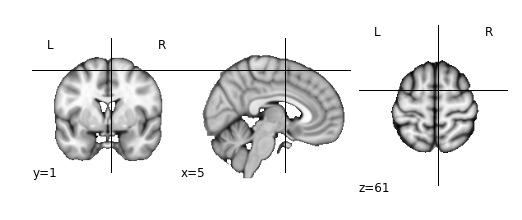

In [1]:
%matplotlib inline
from nipy.labs import viz
import ipywidgets
from IPython.display import display, clear_output

x_value = ipywidgets.IntSlider(min=-75, max=75, value=5, description='x_value')
y_value = ipywidgets.IntSlider(min=-110, max=75, value=1, description='y_value')
z_value = ipywidgets.IntSlider(min=-72, max=85, value=61, description='z_value')

def showInfo(_):
    clear_output()
    coord = [x_value.value, y_value.value, z_value.value]
    coordStr = ','.join([str(coord[0]),str(coord[1]),str(coord[2])])
    %run ../scripts/atlas_reader.py all $coordStr 0 1

    template = '../scripts/templates/MNI152_T1_1mm_brain.nii.gz'
    anatimg = nb.load(template)
    anatdata, anataff = anatimg.get_data(), anatimg.get_affine()
    anatdata = anatdata.astype(np.float)
    anatdata[anatdata < 10.] = np.nan
    fig=viz.plot_anat(anatdata, anataff, coord, slicer='ortho')

showAtlasInfo = ipywidgets.Button(description='Show Atlas Information')
showAtlasInfo.on_click(showInfo)
display(x_value, y_value, z_value, showAtlasInfo)